In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adadelta
from keras.losses import categorical_crossentropy
import keras
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
def classify(path_lncRNA,path_mRNA,save_name,epochs=100,path_savedmodel=None):

    df_lncRNA=pd.read_csv(path_lncRNA)
    df_mRNA=pd.read_csv(path_mRNA)
    print("data shape:",df_lncRNA.shape,df_mRNA.shape)
    
    df = pd.concat([df_lncRNA, df_mRNA], ignore_index=True)
    df = df.sample(frac=1).reset_index(drop=True)
    print("concat shape:",df.shape)

    X = df.iloc[:, :-1]  
    y = df.iloc[:, -1]   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    print("X_train shape:",X_train.shape)
    print("y_test shape:",y_test.shape)

    ip_dem=int(X_train.shape[1]**0.5)
    X_train_reshaped = X_train.values.reshape(X_train.shape[0], ip_dem, ip_dem, 1) 
    y_train_categorical = keras.utils.to_categorical(y_train)

    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(ip_dem, ip_dem, 1), padding='same'))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2, activation='softmax'))

    model.compile(loss=categorical_crossentropy, optimizer=Adadelta(), metrics=['accuracy'])
    model.summary()
    
    if path_savedmodel is None:
        checkpoint = ModelCheckpoint(save_name, monitor='accuracy', verbose=1,
         save_best_only=True, mode='max', save_format='tf')
        history = model.fit(X_train_reshaped, y_train_categorical, epochs=epochs, batch_size=32, callbacks=[checkpoint])
    else:
        model = load_model(path_savedmodel)
        
    X_test_reshaped = X_test.values.reshape(X_test.shape[0], ip_dem, ip_dem, 1)  
    y_pred_probs = model.predict(X_test_reshaped)
    y_pred = np.argmax(y_pred_probs, axis=1)  

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    
    y_pred_probs_positive = model.predict(X_test_reshaped)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_positive)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

        


data shape: (4556, 65) (4556, 65)
concat shape: (9112, 65)
X_train shape: (7745, 64)
y_test shape: (1367,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 32)          320       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 64)          0         
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense) 

INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 3s 11ms/step - loss: 0.6916 - accuracy: 0.5285
Epoch 2/100
241/243 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5201
Epoch 2: accuracy did not improve from 0.52847
243/243 [==============================] - 1s 6ms/step - loss: 0.6911 - accuracy: 0.5206
Epoch 3/100
240/243 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5189
Epoch 3: accuracy did not improve from 0.52847
243/243 [==============================] - 1s 6ms/step - loss: 0.6906 - accuracy: 0.5190
Epoch 4/100
237/243 [============================>.] - ETA: 0s - loss: 0.6901 - accuracy: 0.5265
Epoch 4: accuracy did not improve from 0.52847
243/243 [==============================] - 1s 6ms/step - loss: 0.6901 - accuracy: 0.5272
Epoch 5/100
240/243 [============================>.] - ETA: 0s - loss: 0.6897 - accuracy: 0.5332
Epoch 5: accuracy improved from 0.52847 to 0.53338, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 10ms/step - loss: 0.6897 - accuracy: 0.5334
Epoch 6/100
239/243 [============================>.] - ETA: 0s - loss: 0.6889 - accuracy: 0.5451
Epoch 6: accuracy improved from 0.53338 to 0.54474, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6889 - accuracy: 0.5447
Epoch 7/100
237/243 [============================>.] - ETA: 0s - loss: 0.6883 - accuracy: 0.5617
Epoch 7: accuracy improved from 0.54474 to 0.56101, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6883 - accuracy: 0.5610
Epoch 8/100
234/243 [===========================>..] - ETA: 0s - loss: 0.6879 - accuracy: 0.5755
Epoch 8: accuracy improved from 0.56101 to 0.57508, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6879 - accuracy: 0.5751
Epoch 9/100
237/243 [============================>.] - ETA: 0s - loss: 0.6872 - accuracy: 0.5849
Epoch 9: accuracy improved from 0.57508 to 0.58541, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6872 - accuracy: 0.5854
Epoch 10/100
232/243 [===========================>..] - ETA: 0s - loss: 0.6862 - accuracy: 0.6150
Epoch 10: accuracy improved from 0.58541 to 0.61485, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6863 - accuracy: 0.6148
Epoch 11/100
235/243 [============================>.] - ETA: 0s - loss: 0.6856 - accuracy: 0.6464
Epoch 11: accuracy improved from 0.61485 to 0.64674, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6855 - accuracy: 0.6467
Epoch 12/100
233/243 [===========================>..] - ETA: 0s - loss: 0.6850 - accuracy: 0.6623
Epoch 12: accuracy improved from 0.64674 to 0.66262, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6849 - accuracy: 0.6626
Epoch 13/100
242/243 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.6861
Epoch 13: accuracy improved from 0.66262 to 0.68599, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6841 - accuracy: 0.6860
Epoch 14/100
243/243 [==============================] - ETA: 0s - loss: 0.6833 - accuracy: 0.7088
Epoch 14: accuracy improved from 0.68599 to 0.70884, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6833 - accuracy: 0.7088
Epoch 15/100
235/243 [============================>.] - ETA: 0s - loss: 0.6825 - accuracy: 0.7275
Epoch 15: accuracy improved from 0.70884 to 0.72770, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6825 - accuracy: 0.7277
Epoch 16/100
234/243 [===========================>..] - ETA: 0s - loss: 0.6816 - accuracy: 0.7440
Epoch 16: accuracy improved from 0.72770 to 0.74474, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6815 - accuracy: 0.7447
Epoch 17/100
235/243 [============================>.] - ETA: 0s - loss: 0.6806 - accuracy: 0.7604
Epoch 17: accuracy improved from 0.74474 to 0.76062, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6806 - accuracy: 0.7606
Epoch 18/100
235/243 [============================>.] - ETA: 0s - loss: 0.6795 - accuracy: 0.7855
Epoch 18: accuracy improved from 0.76062 to 0.78657, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6796 - accuracy: 0.7866
Epoch 19/100
239/243 [============================>.] - ETA: 0s - loss: 0.6788 - accuracy: 0.8013
Epoch 19: accuracy improved from 0.78657 to 0.80155, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6787 - accuracy: 0.8015
Epoch 20/100
242/243 [============================>.] - ETA: 0s - loss: 0.6774 - accuracy: 0.8100
Epoch 20: accuracy improved from 0.80155 to 0.81007, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6774 - accuracy: 0.8101
Epoch 21/100
240/243 [============================>.] - ETA: 0s - loss: 0.6769 - accuracy: 0.8177
Epoch 21: accuracy improved from 0.81007 to 0.81795, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6769 - accuracy: 0.8179
Epoch 22/100
237/243 [============================>.] - ETA: 0s - loss: 0.6754 - accuracy: 0.8237
Epoch 22: accuracy improved from 0.81795 to 0.82440, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6754 - accuracy: 0.8244
Epoch 23/100
239/243 [============================>.] - ETA: 0s - loss: 0.6743 - accuracy: 0.8319
Epoch 23: accuracy improved from 0.82440 to 0.83292, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6743 - accuracy: 0.8329
Epoch 24/100
234/243 [===========================>..] - ETA: 0s - loss: 0.6731 - accuracy: 0.8408
Epoch 24: accuracy improved from 0.83292 to 0.84015, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6731 - accuracy: 0.8402
Epoch 25/100
239/243 [============================>.] - ETA: 0s - loss: 0.6719 - accuracy: 0.8438
Epoch 25: accuracy improved from 0.84015 to 0.84325, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6718 - accuracy: 0.8433
Epoch 26/100
237/243 [============================>.] - ETA: 0s - loss: 0.6709 - accuracy: 0.8383
Epoch 26: accuracy did not improve from 0.84325
243/243 [==============================] - 1s 4ms/step - loss: 0.6709 - accuracy: 0.8389
Epoch 27/100
236/243 [============================>.] - ETA: 0s - loss: 0.6693 - accuracy: 0.8477
Epoch 27: accuracy improved from 0.84325 to 0.84790, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6692 - accuracy: 0.8479
Epoch 28/100
242/243 [============================>.] - ETA: 0s - loss: 0.6677 - accuracy: 0.8471
Epoch 28: accuracy did not improve from 0.84790
243/243 [==============================] - 1s 4ms/step - loss: 0.6677 - accuracy: 0.8471
Epoch 29/100
233/243 [===========================>..] - ETA: 0s - loss: 0.6664 - accuracy: 0.8537
Epoch 29: accuracy improved from 0.84790 to 0.85294, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6665 - accuracy: 0.8529
Epoch 30/100
238/243 [============================>.] - ETA: 0s - loss: 0.6651 - accuracy: 0.8550
Epoch 30: accuracy improved from 0.85294 to 0.85500, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6652 - accuracy: 0.8550
Epoch 31/100
241/243 [============================>.] - ETA: 0s - loss: 0.6634 - accuracy: 0.8555
Epoch 31: accuracy improved from 0.85500 to 0.85513, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6634 - accuracy: 0.8551
Epoch 32/100
236/243 [============================>.] - ETA: 0s - loss: 0.6620 - accuracy: 0.8578
Epoch 32: accuracy improved from 0.85513 to 0.85759, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6619 - accuracy: 0.8576
Epoch 33/100
238/243 [============================>.] - ETA: 0s - loss: 0.6604 - accuracy: 0.8582
Epoch 33: accuracy improved from 0.85759 to 0.85810, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6604 - accuracy: 0.8581
Epoch 34/100
235/243 [============================>.] - ETA: 0s - loss: 0.6584 - accuracy: 0.8678
Epoch 34: accuracy improved from 0.85810 to 0.86740, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6583 - accuracy: 0.8674
Epoch 35/100
236/243 [============================>.] - ETA: 0s - loss: 0.6566 - accuracy: 0.8596
Epoch 35: accuracy did not improve from 0.86740
243/243 [==============================] - 1s 4ms/step - loss: 0.6566 - accuracy: 0.8599
Epoch 36/100
235/243 [============================>.] - ETA: 0s - loss: 0.6542 - accuracy: 0.8614
Epoch 36: accuracy did not improve from 0.86740
243/243 [==============================] - 1s 4ms/step - loss: 0.6542 - accuracy: 0.8617
Epoch 37/100
232/243 [===========================>..] - ETA: 0s - loss: 0.6524 - accuracy: 0.8657
Epoch 37: accuracy improved from 0.86740 to 0.86830, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6524 - accuracy: 0.8683
Epoch 38/100
238/243 [============================>.] - ETA: 0s - loss: 0.6507 - accuracy: 0.8684
Epoch 38: accuracy improved from 0.86830 to 0.86908, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6506 - accuracy: 0.8691
Epoch 39/100
232/243 [===========================>..] - ETA: 0s - loss: 0.6485 - accuracy: 0.8683
Epoch 39: accuracy did not improve from 0.86908
243/243 [==============================] - 1s 4ms/step - loss: 0.6484 - accuracy: 0.8668
Epoch 40/100
242/243 [============================>.] - ETA: 0s - loss: 0.6461 - accuracy: 0.8662
Epoch 40: accuracy did not improve from 0.86908
243/243 [==============================] - 1s 4ms/step - loss: 0.6461 - accuracy: 0.8662
Epoch 41/100
233/243 [===========================>..] - ETA: 0s - loss: 0.6437 - accuracy: 0.8695
Epoch 41: accuracy improved from 0.86908 to 0.87050, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.6439 - accuracy: 0.8705
Epoch 42/100
233/243 [===========================>..] - ETA: 0s - loss: 0.6420 - accuracy: 0.8699
Epoch 42: accuracy did not improve from 0.87050
243/243 [==============================] - 1s 4ms/step - loss: 0.6415 - accuracy: 0.8702
Epoch 43/100
240/243 [============================>.] - ETA: 0s - loss: 0.6395 - accuracy: 0.8651
Epoch 43: accuracy did not improve from 0.87050
243/243 [==============================] - 1s 4ms/step - loss: 0.6396 - accuracy: 0.8651
Epoch 44/100
235/243 [============================>.] - ETA: 0s - loss: 0.6363 - accuracy: 0.8739
Epoch 44: accuracy improved from 0.87050 to 0.87347, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6367 - accuracy: 0.8735
Epoch 45/100
242/243 [============================>.] - ETA: 0s - loss: 0.6343 - accuracy: 0.8711
Epoch 45: accuracy did not improve from 0.87347
243/243 [==============================] - 1s 4ms/step - loss: 0.6343 - accuracy: 0.8711
Epoch 46/100
237/243 [============================>.] - ETA: 0s - loss: 0.6315 - accuracy: 0.8747
Epoch 46: accuracy improved from 0.87347 to 0.87489, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6316 - accuracy: 0.8749
Epoch 47/100
232/243 [===========================>..] - ETA: 0s - loss: 0.6290 - accuracy: 0.8753
Epoch 47: accuracy did not improve from 0.87489
243/243 [==============================] - 1s 5ms/step - loss: 0.6291 - accuracy: 0.8744
Epoch 48/100
236/243 [============================>.] - ETA: 0s - loss: 0.6262 - accuracy: 0.8773
Epoch 48: accuracy improved from 0.87489 to 0.87747, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6261 - accuracy: 0.8775
Epoch 49/100
238/243 [============================>.] - ETA: 0s - loss: 0.6230 - accuracy: 0.8753
Epoch 49: accuracy did not improve from 0.87747
243/243 [==============================] - 1s 5ms/step - loss: 0.6230 - accuracy: 0.8759
Epoch 50/100
242/243 [============================>.] - ETA: 0s - loss: 0.6197 - accuracy: 0.8812
Epoch 50: accuracy improved from 0.87747 to 0.88121, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6197 - accuracy: 0.8812
Epoch 51/100
232/243 [===========================>..] - ETA: 0s - loss: 0.6167 - accuracy: 0.8846
Epoch 51: accuracy improved from 0.88121 to 0.88393, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6167 - accuracy: 0.8839
Epoch 52/100
232/243 [===========================>..] - ETA: 0s - loss: 0.6134 - accuracy: 0.8824
Epoch 52: accuracy did not improve from 0.88393
243/243 [==============================] - 1s 5ms/step - loss: 0.6135 - accuracy: 0.8822
Epoch 53/100
235/243 [============================>.] - ETA: 0s - loss: 0.6104 - accuracy: 0.8811
Epoch 53: accuracy did not improve from 0.88393
243/243 [==============================] - 1s 5ms/step - loss: 0.6098 - accuracy: 0.8812
Epoch 54/100
234/243 [===========================>..] - ETA: 0s - loss: 0.6084 - accuracy: 0.8823
Epoch 54: accuracy improved from 0.88393 to 0.88431, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.6078 - accuracy: 0.8843
Epoch 55/100
234/243 [===========================>..] - ETA: 0s - loss: 0.6037 - accuracy: 0.8850
Epoch 55: accuracy did not improve from 0.88431
243/243 [==============================] - 1s 4ms/step - loss: 0.6039 - accuracy: 0.8842
Epoch 56/100
238/243 [============================>.] - ETA: 0s - loss: 0.6001 - accuracy: 0.8864
Epoch 56: accuracy improved from 0.88431 to 0.88689, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 9ms/step - loss: 0.6001 - accuracy: 0.8869
Epoch 57/100
235/243 [============================>.] - ETA: 0s - loss: 0.5977 - accuracy: 0.8874
Epoch 57: accuracy improved from 0.88689 to 0.88741, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.5969 - accuracy: 0.8874
Epoch 58/100
233/243 [===========================>..] - ETA: 0s - loss: 0.5932 - accuracy: 0.8867
Epoch 58: accuracy improved from 0.88741 to 0.88767, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 7ms/step - loss: 0.5932 - accuracy: 0.8877
Epoch 59/100
232/243 [===========================>..] - ETA: 0s - loss: 0.5898 - accuracy: 0.8943
Epoch 59: accuracy improved from 0.88767 to 0.89503, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.5897 - accuracy: 0.8950
Epoch 60/100
237/243 [============================>.] - ETA: 0s - loss: 0.5856 - accuracy: 0.8936
Epoch 60: accuracy did not improve from 0.89503
243/243 [==============================] - 1s 5ms/step - loss: 0.5856 - accuracy: 0.8941
Epoch 61/100
231/243 [===========================>..] - ETA: 0s - loss: 0.5825 - accuracy: 0.8949
Epoch 61: accuracy improved from 0.89503 to 0.89516, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.5825 - accuracy: 0.8952
Epoch 62/100
235/243 [============================>.] - ETA: 0s - loss: 0.5790 - accuracy: 0.8981
Epoch 62: accuracy improved from 0.89516 to 0.89839, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 9ms/step - loss: 0.5787 - accuracy: 0.8984
Epoch 63/100
234/243 [===========================>..] - ETA: 0s - loss: 0.5748 - accuracy: 0.8977
Epoch 63: accuracy did not improve from 0.89839
243/243 [==============================] - 1s 5ms/step - loss: 0.5748 - accuracy: 0.8979
Epoch 64/100
235/243 [============================>.] - ETA: 0s - loss: 0.5707 - accuracy: 0.9064
Epoch 64: accuracy improved from 0.89839 to 0.90639, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 3s 10ms/step - loss: 0.5707 - accuracy: 0.9064
Epoch 65/100
235/243 [============================>.] - ETA: 0s - loss: 0.5677 - accuracy: 0.8977
Epoch 65: accuracy did not improve from 0.90639
243/243 [==============================] - 1s 5ms/step - loss: 0.5674 - accuracy: 0.8983
Epoch 66/100
238/243 [============================>.] - ETA: 0s - loss: 0.5627 - accuracy: 0.9006
Epoch 66: accuracy did not improve from 0.90639
243/243 [==============================] - 1s 5ms/step - loss: 0.5629 - accuracy: 0.9011
Epoch 67/100
237/243 [============================>.] - ETA: 0s - loss: 0.5597 - accuracy: 0.9010
Epoch 67: accuracy did not improve from 0.90639
243/243 [==============================] - 1s 5ms/step - loss: 0.5594 - accuracy: 0.9006
Epoch 68/100
232/243 [===========================>..] - ETA: 0s - loss: 0.5553 - accuracy: 0.9027
Epoch 68: accuracy did not improve from 0.90639
243/243 [==============================] - 1s 5ms/step - lo

INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.5434 - accuracy: 0.9069
Epoch 72/100
239/243 [============================>.] - ETA: 0s - loss: 0.5389 - accuracy: 0.9038
Epoch 72: accuracy did not improve from 0.90691
243/243 [==============================] - 1s 4ms/step - loss: 0.5389 - accuracy: 0.9039
Epoch 73/100
236/243 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.9064
Epoch 73: accuracy improved from 0.90691 to 0.90704, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.5357 - accuracy: 0.9070
Epoch 74/100
239/243 [============================>.] - ETA: 0s - loss: 0.5310 - accuracy: 0.9060
Epoch 74: accuracy did not improve from 0.90704
243/243 [==============================] - 1s 4ms/step - loss: 0.5313 - accuracy: 0.9059
Epoch 75/100
237/243 [============================>.] - ETA: 0s - loss: 0.5282 - accuracy: 0.9072
Epoch 75: accuracy did not improve from 0.90704
243/243 [==============================] - 1s 5ms/step - loss: 0.5280 - accuracy: 0.9066
Epoch 76/100
241/243 [============================>.] - ETA: 0s - loss: 0.5230 - accuracy: 0.9077
Epoch 76: accuracy improved from 0.90704 to 0.90755, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 9ms/step - loss: 0.5231 - accuracy: 0.9076
Epoch 77/100
237/243 [============================>.] - ETA: 0s - loss: 0.5203 - accuracy: 0.9092
Epoch 77: accuracy improved from 0.90755 to 0.90910, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.5202 - accuracy: 0.9091
Epoch 78/100
235/243 [============================>.] - ETA: 0s - loss: 0.5156 - accuracy: 0.9062
Epoch 78: accuracy did not improve from 0.90910
243/243 [==============================] - 1s 4ms/step - loss: 0.5154 - accuracy: 0.9069
Epoch 79/100
232/243 [===========================>..] - ETA: 0s - loss: 0.5123 - accuracy: 0.9084
Epoch 79: accuracy did not improve from 0.90910
243/243 [==============================] - 1s 4ms/step - loss: 0.5125 - accuracy: 0.9090
Epoch 80/100
242/243 [============================>.] - ETA: 0s - loss: 0.5088 - accuracy: 0.9086
Epoch 80: accuracy did not improve from 0.90910
243/243 [==============================] - 1s 4ms/step - loss: 0.5087 - accuracy: 0.9086
Epoch 81/100
232/243 [===========================>..] - ETA: 0s - loss: 0.5031 - accuracy: 0.9089
Epoch 81: accuracy did not improve from 0.90910
243/243 [==============================] - 1s 5ms/step - los

INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 9ms/step - loss: 0.4940 - accuracy: 0.9094
Epoch 85/100
236/243 [============================>.] - ETA: 0s - loss: 0.4895 - accuracy: 0.9093
Epoch 85: accuracy improved from 0.90936 to 0.90988, saving model to bmep_k3


INFO:tensorflow:Assets written to: bmep_k3\assets


INFO:tensorflow:Assets written to: bmep_k3\assets


243/243 [==============================] - 2s 8ms/step - loss: 0.4897 - accuracy: 0.9099
Epoch 86/100
238/243 [============================>.] - ETA: 0s - loss: 0.4868 - accuracy: 0.9090
Epoch 86: accuracy did not improve from 0.90988
243/243 [==============================] - 1s 5ms/step - loss: 0.4864 - accuracy: 0.9094
Epoch 87/100
232/243 [===========================>..] - ETA: 0s - loss: 0.4827 - accuracy: 0.9052
Epoch 87: accuracy did not improve from 0.90988
243/243 [==============================] - 1s 5ms/step - loss: 0.4826 - accuracy: 0.9054
Epoch 88/100
232/243 [===========================>..] - ETA: 0s - loss: 0.4788 - accuracy: 0.9052
Epoch 88: accuracy did not improve from 0.90988
243/243 [==============================] - 1s 5ms/step - loss: 0.4788 - accuracy: 0.9060
Epoch 89/100
238/243 [============================>.] - ETA: 0s - loss: 0.4757 - accuracy: 0.9077
Epoch 89: accuracy did not improve from 0.90988
243/243 [==============================] - 1s 5ms/step - los

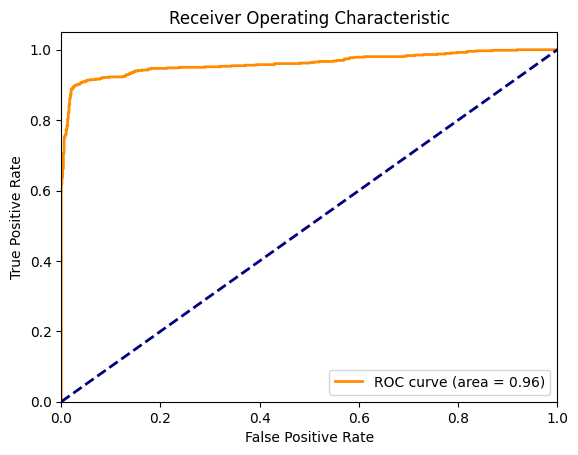

In [3]:
classify(path_lncRNA='Preprocessed_Data\df_lnRNA_k=3.csv',path_mRNA='Preprocessed_Data\df_mrna_k=3.csv',
save_name='bmep_k3')